# DoF on Edges in Three Dimensions

We describe general idea of the data structures generated in subroutine 
`dof3edge` for three dimensional simplex grids. We refer to [Simplicial Complex in Two Dimensions](../mesh/sc3.html) for the discussion of ordering and orientation of edges.

`[elem2edge,edge] = dof3edge(elem)` constructs data structure for the
lowest order edge element. In the output `elem2edge` is the elementwise
pointer from `elem` to `edge`. The orientation of edges is from the smaller
index to the bigger one. The indexing is the lexicographic order
`locEdge = [1 2], [1 3], [1 4], [2 3], [2 4], [3 4]`
and the ascend ordering is used. 

`[elem2edge,edge,elem2edgeSign] = dof3edge(elem)` also outputs elem2edgeSign
which records the consistency of the local and the global edge orientation.
If elem is the ascend ordering, then `elem2edgeSign` is 1 and not needed.

See also `dofedge`.

## Edges and local Edges


elem2edge =

     1    12     5    20    11     4



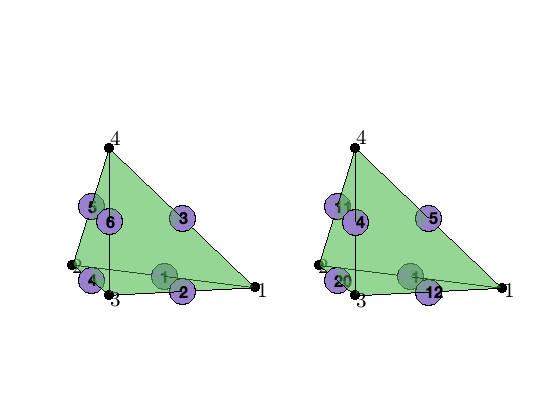

In [2]:
%% Local Labeling of DOFs
node = [1,0,0; 0,1,0; 0,0,0; 0,0,1];
elem = [1 2 3 4];
localEdge = [1 2; 1 3; 1 4; 2 3; 2 4; 3 4];
edge = zeros(20,2);
edge([1 12 5 20 11 4],:) = localEdge;
elem2edge = [1 12 5 20 11 4];
figure(1); clf;
set(gcf,'Units','normal'); 
set(gcf,'Position',[0,0,0.6,0.4]);
subplot(1,2,1)
showmesh3(node,elem);
view(-14,12);
findnode3(node);
findedge(node,localEdge,'all');
subplot(1,2,2)
showmesh3(node,elem);
view(-14,12);
findnode3(node);
findedge(node,edge,elem2edge');
display(elem2edge);

The 6 dofs associated to edges in a tetrahedron is stored as `[1 2; 1 3; 1 4; 2 3; 2 4; 3 4]`. Here `[1 2 3 4]` are 4 vertices of the tetrahedron.

For a mesh consisting of several tetrahedrons, all local edges are collected and the duplication is eliminated to form `edge` matrix. The pointer `elem2edge(:,1:6)` records the mapping from the local index to the global index of 6 edges in one tetrahedron. The left figure is the local edge index and the right is the global one.

## Orientation of Edges


elem2edge =

     1     2     3     4     5     6


elem2edgeSign =

     1     1    -1    -1    -1    -1



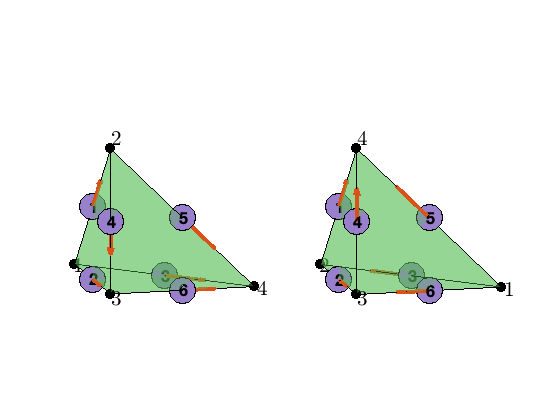

In [3]:
%% Orientation of Edges
node = [1,0,0; 0,1,0; 0,0,0; 0,0,1];
elem = [2 4 3 1];
localEdge = [elem(:,1) elem(:,2); elem(:,1) elem(:,3); elem(:,1) elem(:,4); ...
             elem(:,2) elem(:,3); elem(:,2) elem(:,4); elem(:,3) elem(:,4)];
edge = sort(localEdge,2);
elem2edge = [1 2 3 4 5 6];
elem2edgeSign = [1 1 -1 -1 -1 -1];     
figure(1); clf;
set(gcf,'Units','normal'); 
set(gcf,'Position',[0,0,0.6,0.4]);
subplot(1,2,1)
showmesh3(node,elem);
view(-14,12);
tempnode = node(elem(:),:);
findnode3(tempnode);
findedge(node,localEdge,'all','vec');
subplot(1,2,2)
showmesh3(node,elem);
view(-14,12);
findnode3(node);
findedge(node,edge,'all','vec');
display(elem2edge)
display(elem2edgeSign)

The edge `[i,j]` is orientated in the direction such that `i<j`, where `i,j`
are the *global* indices. The local 6 edges may not be consistent with this orientation. Therefore `elem2edgeSign` is used to indicate the consistency.

The nodal indices in the left figure is local while that in the right is the global one. The local direction and global direction of edges is indicated by different edge vectors.

The local vertex index and orientation of local edges are shown on the left while the right is the global version. Note that we intentionally set `elem = [2 4 3 1]` such that inconsistency arises. 

## Example


elem2edge =

  6�6 uint32 matrix

    1    3    7    8   10   14
    2    3    7   11   13   14
    4    5    7   15   17   18
    4    6    7   16   17   19
    1    5    7    9   10   18
    2    6    7   12   13   19


elem2edgeSign =

     1     1     1     1     1     1
     1     1     1     1     1     1
     1     1     1     1     1     1
     1     1     1     1     1     1
     1     1     1     1     1     1
     1     1     1     1     1     1



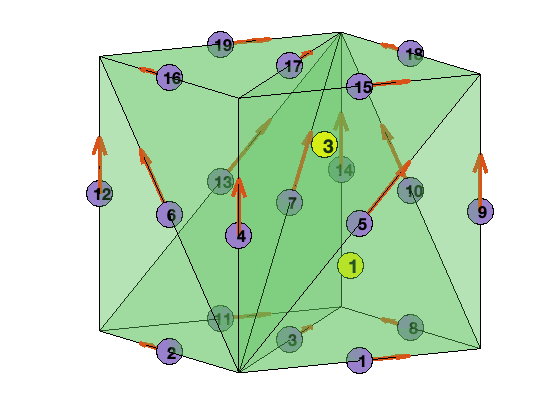

In [4]:
[node,elem] = cubemesh([0,1,0,1,0,1],1);
[elem2edge,edge,elem2edgeSign] = dof3edge(elem);
figure(1); clf;
showmesh3(node,elem,[],'FaceAlpha',0.25);
view(-30,10);
findedge(node,edge,'all','vec');
findelem3(node,elem,[1 3]');
display(elem2edge);
display(elem2edgeSign);